# Data processing 
---

1.) Jupyter Notebooks (install, basic usage) 
---


2.) FileIO and data manipulation (read, write, different data formats)
---


3.) Plotting (data visualization) 
---







# Installing Jupyter Notebook

In [595]:
using Pkg
Pkg.add("IJulia")
using IJulia
#notebook()

   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`


# The notebook interface

#### List of commands in the command palette
Ctrl + Shift + p or Command + Shift + p
#### Help
Navigation bar -> Help or press h if in Edit mode
#### Cells
- Code cell, contains code to be executed
- Markdown cell for text formatting
- Use arrow keys to navigate up and down cells
- Hit Return to enter into cell in coding mode or
- press m and press Return to enter into markdown mode
- Execute cell by pressing run in navigation bar or
- press Ctrl + Return or Shift + Return
- Press Esc to leave cell editing


# Activating your enviroment

In [554]:
using Pkg
Pkg.activate(".")

  Activating environment at `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`


# FileIO
### File stream
Reading and writing of text files:

In [555]:
f = open("output.txt", "w")

IOStream(<file output.txt>)

In [556]:
write(f, "This is a first line of text.\n")

30

In [557]:
write(f, "This is another line of text.\n")

30

In [558]:
close(f)

Many things can go wrong when reading or writing files, therfore it is good practise <br>
to catch possible errors and to make sure the filestream is closed again:

In [559]:
f = open("output.txt", "r")
try
    l = readline(f)
    l = readline(f)
    write(f, "last line of text.\n")
catch exc
    println("Something went wrong: $exc")
finally
    close(f)
end

Something went wrong: ArgumentError("write failed, IOStream is not writeable")


Another way of opening a stream for writing:

In [560]:
open("other_output.txt", "w") do f
    write(f, "text for another file.")
end

22

# JSON

Structure for universal data exchange.


In [561]:
Pkg.add("JSON");
using JSON

   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`


#### Read and write JSON data:

Create sample dictionary to hold the data

In [562]:
# dictionary to write
dict1 = Dict("key1" => 1, "key2" => 2,
            "key3" => Dict("sub1"=>"some text","sub2"=>5.4335,"sub3"=>[3,5,7,3]))
            

Dict{String, Any} with 3 entries:
  "key2" => 2
  "key3" => Dict{String, Any}("sub2"=>5.4335, "sub3"=>[3, 5, 7, 3], "sub1"=>"so…
  "key1" => 1

In [563]:
# cast dict into json format
stringdata = JSON.json(dict1)

"{\"key2\":2,\"key3\":{\"sub2\":5.4335,\"sub3\":[3,5,7,3],\"sub1\":\"some text\"},\"key1\":1}"

#### Writing text string to output stream:

In [564]:
f = open("out_json.json", "w")
try
    write(f, stringdata)
catch exc
    println("Something went wrong: $exc")
finally
    close(f)
end

78

#### Reading back the JSON file:

In [565]:
jDict = Dict()
open("out_json.json", "r") do f
    global jDict
    jDict=JSON.parse(f)  # parse and transform data
end

Dict{String, Any} with 3 entries:
  "key2" => 2
  "key3" => Dict{String, Any}("sub2"=>5.4335, "sub3"=>Any[3, 5, 7, 3], "sub1"=>…
  "key1" => 1

For other IO (Multimedia, Network) there is extensive documentation: <br>
https://docs.julialang.org/en/v1/base/io-network/


## Installing a few more Packages

In [566]:
Pkg.add("CSV");
Pkg.add("XLSX");
Pkg.add("DataFrames");

   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`
   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`
   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`


In [567]:
using CSV
using DataFrames
using XLSX

### Loading Excel Data

In [568]:
xf = XLSX.readxlsx("demo_data.xlsx")

XLSXFile("demo_data.xlsx") containing 1 Worksheet
            sheetname size          range        
-------------------------------------------------
               Sheet1 6x3           A1:C6        


In [569]:
XLSX.sheetnames(xf)

1-element Vector{String}:
 "Sheet1"

In [570]:
sh = xf["Sheet1"]
typeof(sh)

XLSX.Worksheet

Selecting all data from Sheet

In [571]:
sh[:]

6×3 Matrix{Any}:
 "Name"                "Salary"  "Entry"
 "Jon Doo"        75000          2010-10-23
 "Rose Bush"      60000          2013-03-04
 "Anne Teak"      83000          2007-11-12
 "Rod Knee"       55000          2019-08-23
 "Hank R. Cheef"  98000          2001-04-29

In [572]:
# Selecting only 2 rows and 2 columns
sh["A1:B3"]

3×2 Matrix{Any}:
 "Name"            "Salary"
 "Jon Doo"    75000
 "Rose Bush"  60000

Lets cast the Matrix into a DataFrame

In [573]:
# Leave the first row out (column names)
hr = sh["A2:C6"] |> DataFrame

,x1,x2,x3
,Any,Any,Any
1,Jon Doo,75000,2010-10-23
2,Rose Bush,60000,2013-03-04
3,Anne Teak,83000,2007-11-12
4,Rod Knee,55000,2019-08-23
5,Hank R. Cheef,98000,2001-04-29


In [574]:
# Manually rename the columns
rename!(hr, [:Name, :Salary, :Entry_Date])

,Name,Salary,Entry_Date
,Any,Any,Any
1,Jon Doo,75000,2010-10-23
2,Rose Bush,60000,2013-03-04
3,Anne Teak,83000,2007-11-12
4,Rod Knee,55000,2019-08-23
5,Hank R. Cheef,98000,2001-04-29


We can combine all these steps into one:

In [575]:
hr = DataFrame(XLSX.readtable("demo_data.xlsx", "Sheet1")...)

,Name,Salary,Entry
,Any,Any,Any
1,Jon Doo,75000,2010-10-23
2,Rose Bush,60000,2013-03-04
3,Anne Teak,83000,2007-11-12
4,Rod Knee,55000,2019-08-23
5,Hank R. Cheef,98000,2001-04-29


In [576]:
typeof(hr)

DataFrame

#### Let's save the dataframe as CSV file:

In [577]:
CSV.write("HR_Sheet.csv", hr)

"HR_Sheet.csv"

#### Read in CSV file:

In [578]:
hr_csv = CSV.File("HR_Sheet.csv")

5-element CSV.File{false}:
 CSV.Row: (Name = "Jon Doo", Salary = 75000, Entry = Date("2010-10-23"))
 CSV.Row: (Name = "Rose Bush", Salary = 60000, Entry = Date("2013-03-04"))
 CSV.Row: (Name = "Anne Teak", Salary = 83000, Entry = Date("2007-11-12"))
 CSV.Row: (Name = "Rod Knee", Salary = 55000, Entry = Date("2019-08-23"))
 CSV.Row: (Name = "Hank R. Cheef", Salary = 98000, Entry = Date("2001-04-29"))

In [579]:
# Select the Name field of the first CSV row
hr_csv[1][:Name]

"Jon Doo"

#### Use DataFrames instead of CSV.Row

In [580]:
hr_csv = CSV.File("HR_Sheet.csv", header=true) |> DataFrame

,Name,Salary,Entry
,String,Int64,Date
1,Jon Doo,75000,2010-10-23
2,Rose Bush,60000,2013-03-04
3,Anne Teak,83000,2007-11-12
4,Rod Knee,55000,2019-08-23
5,Hank R. Cheef,98000,2001-04-29


####  Now, let's read another Excel file:

In [581]:
hr_departments = DataFrame(XLSX.readtable("demo_data2.xlsx", "Sheet1")...)

,Name,Department
,Any,Any
1,Jon Doo,HR
2,Rose Bush,R&D
3,Anne Teak,R&D
4,Rod Knee,Marketing
5,Hank R. Cheef,GM


#### Casting into datatypes while reading:

In [511]:
hr_departments = DataFrame(XLSX.readtable("demo_data2.xlsx", "Sheet1", infer_eltypes=true)...)

,Name,Department
,String,String
1,Jon Doo,HR
2,Rose Bush,R&D
3,Anne Teak,R&D
4,Rod Knee,Marketing
5,Hank R. Cheef,GM


Let's join both tables into one:

In [512]:
hr_all = innerjoin(hr_csv, hr_departments, on=:Name)

,Name,Salary,Entry,Department
,String,Int64,Date,String
1,Jon Doo,75000,2010-10-23,HR
2,Rose Bush,60000,2013-03-04,R&D
3,Anne Teak,83000,2007-11-12,R&D
4,Rod Knee,55000,2019-08-23,Marketing
5,Hank R. Cheef,98000,2001-04-29,GM


#### Selecting fields and sub-sets
Selecting a single column:

In [513]:
hr_all.Name

5-element Vector{String}:
 "Jon Doo"
 "Rose Bush"
 "Anne Teak"
 "Rod Knee"
 "Hank R. Cheef"

In [514]:
hr_all[!, :Name]

5-element Vector{String}:
 "Jon Doo"
 "Rose Bush"
 "Anne Teak"
 "Rod Knee"
 "Hank R. Cheef"

#### Sub-setting by condition:

In [515]:
# Our condition:
hr_all.Salary .> 75000

5-element BitVector:
 0
 0
 1
 0
 1

In [516]:
hr_all[hr_all.Salary .> 75000, :]

,Name,Salary,Entry,Department
,String,Int64,Date,String
1,Anne Teak,83000,2007-11-12,R&D
2,Hank R. Cheef,98000,2001-04-29,GM


#### Sub-setting columns by name:

In [519]:
hr_all[!, [:Name, :Entry]]

,Name,Entry
,String,Date
1,Jon Doo,2010-10-23
2,Rose Bush,2013-03-04
3,Anne Teak,2007-11-12
4,Rod Knee,2019-08-23
5,Hank R. Cheef,2001-04-29


# Using the Query.jl package

In [520]:
Pkg.add("Query");
using Query;
using Statistics

   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`


Pipe operator "|>" is used to feed the output of an operation into the input of the next function, e.g. select, filter and sub-set dataframes: <br>
The command from above: <br>


**`hr_all[hr_all.Salary .> 75000, :]`** <br>


can be written as:

In [521]:
hr_all |> @filter(_.Salary > 75000)

Name,Salary,Entry,Department
"""Anne Teak""",83000,"Date(""2007-11-12"")","""R&D"""
"""Hank R. Cheef""",98000,"Date(""2001-04-29"")","""GM"""


This way we can pipe easily multiple commands:

In [522]:
top = hr_all |> 
            @select(:Name, :Salary, :Department) |> 
            @filter(_.Salary > 75000) |>
            DataFrame

,Name,Salary,Department
,String,Int64,String
1,Anne Teak,83000,R&D
2,Hank R. Cheef,98000,GM


In [523]:
df2 = hr_all |>
            @groupby(_.Department) |>
            @map({Department=key(_), Salary=mean(_.Salary)}) |>
            DataFrame

,Department,Salary
,String,Float64
1,HR,75000.0
2,R&D,71500.0
3,Marketing,55000.0
4,GM,98000.0


Detailed description of parameters for import and export can be found in the package documentation: <br>
#### CSV.jl 
https://csv.juliadata.org/stable/
#### XLSX.jl 
https://felipenoris.github.io/XLSX.jl/stable/ <br>


For example in CSV.jl you can normalize the column names to remove unwanted characters <br>
as whitespaces etc.

# How to download data from url:

In [582]:
d=download("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv")

"/var/folders/p5/vnkq8n3d0s9_ftw6ktg1b4bcrqfp_x/T/jl_aOviFf"

In [583]:
weather = CSV.File(d) |> DataFrame
describe(weather)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,date,,2014-07-01,,2015-06-30,0,Date
2,actual_mean_temp,61.0493,18,63.0,88,0,Int64
3,actual_min_temp,49.9589,7,52.0,75,0,Int64
4,actual_max_temp,71.6301,26,73.0,100,0,Int64
5,average_min_temp,48.8192,29,48.0,68,0,Int64
6,average_max_temp,70.9836,50,72.0,89,0,Int64
7,record_min_temp,31.4658,-5,30.0,62,0,Int64
8,record_max_temp,88.7288,69,90.0,104,0,Int64
9,record_min_temp_year,1953.28,1879,1963.0,2015,0,Int64


# Iris Dataset

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [584]:
Pkg.add("RDatasets");
using RDatasets;

   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`


In [585]:
# Loading the Iris dataset:
iris = dataset("datasets", "iris");
size(iris)

(150, 5)

Explore the table by using `first(<data>, nrows)`

In [586]:
first(iris, 3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [587]:
# Using sclicing
iris[1:3, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [588]:
describe(iris)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


# The Split-Apply-Combine Strategy

In [529]:
gdf = groupby(iris, :Species);

In [530]:
combine(gdf, :PetalLength => mean)

,Species,PetalLength_mean
,Cat…,Float64
1,setosa,1.462
2,versicolor,4.26
3,virginica,5.552


In [531]:
combine(gdf, :PetalLength => (x -> [extrema(x)]) => [:min, :max])

,Species,min,max
,Cat…,Float64,Float64
1,setosa,1.0,1.9
2,versicolor,3.0,5.1
3,virginica,4.5,6.9


# Plotting data
using Plots.jl

In [589]:
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`


#### Basic line plot:

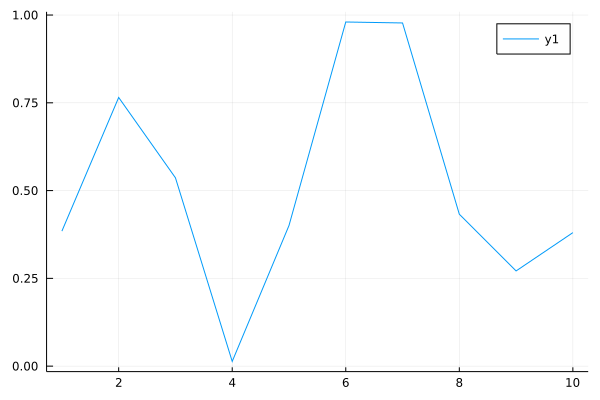

In [590]:
plot(1:10, rand(10))

#### we can add more data:

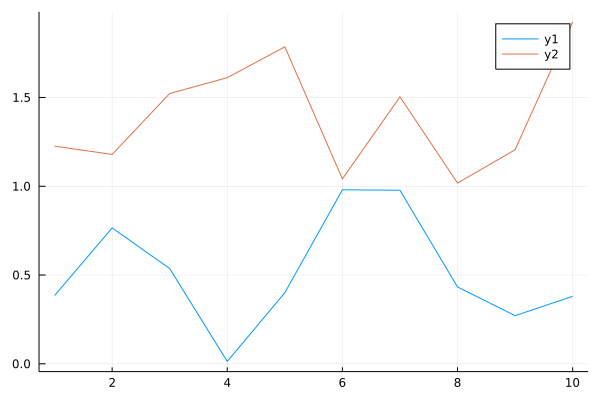

In [591]:
plot!(rand(10).+1)

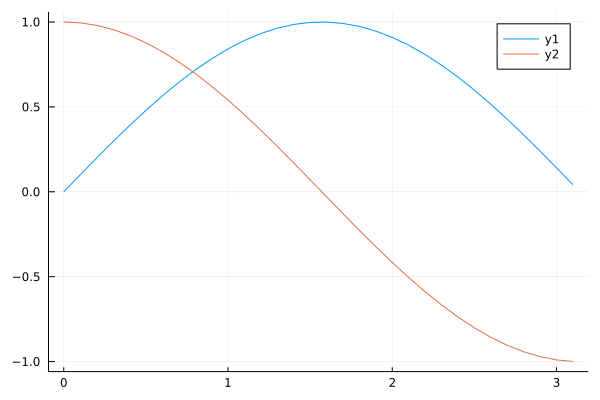

In [592]:
plot([sin,cos], 0:0.1:π) 

#### Plots with annotations:

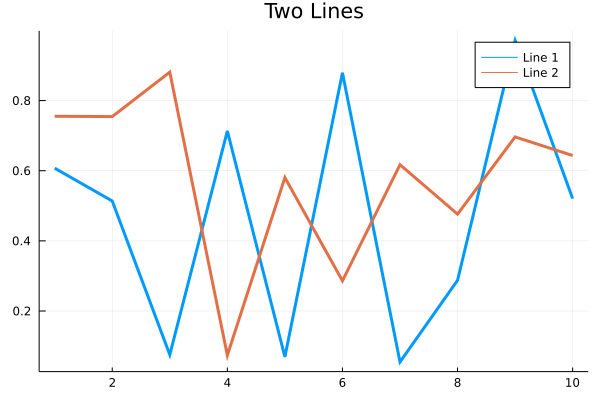

In [593]:
x = 1:10
y = rand(10, 2)

plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)

# Selecting different the plotting backends

Plot.jl uses a default backend for plotting 

- GR (fast)
- Plotly (interactive)
- Pyplot 
- etc

#### Changing the plotting backend


Switch to interactive plotting:

In [537]:
plotly() 

Plots.PlotlyBackend()

In [538]:
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)

<!DOCTYPE html>
 
 
 Plots.jl

#### Adding layout and combining different plots:

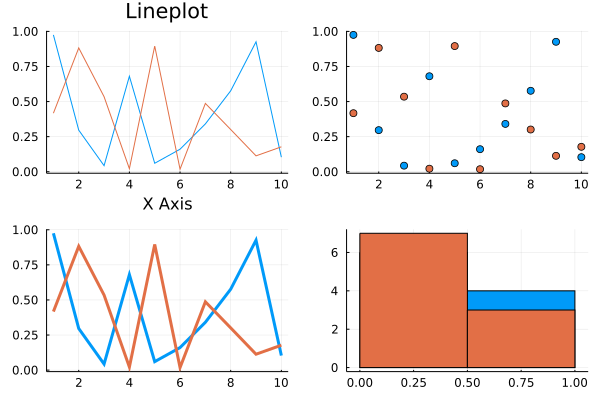

In [539]:
gr()

p1 = plot(x, y, xlabel = "X Axis", title = "Lineplot") # Line plot
p2 = scatter(x, y) # Scatter plot
p3 = plot(x, y, lw = 3) # Another line plot
p4 = histogram(x, y) # Histogram
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

# Using the StatsPlots package

In [540]:
Pkg.add("StatsPlots")
using StatsPlots

   Resolving package versions...
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Project.toml`
  No Changes to `~/work/Julia/tutorials/Elixir_training_2021-04-22/Manifest.toml`


#### Moving back to the Iris dataset:

Scatter plot the petal length vs. petal width 

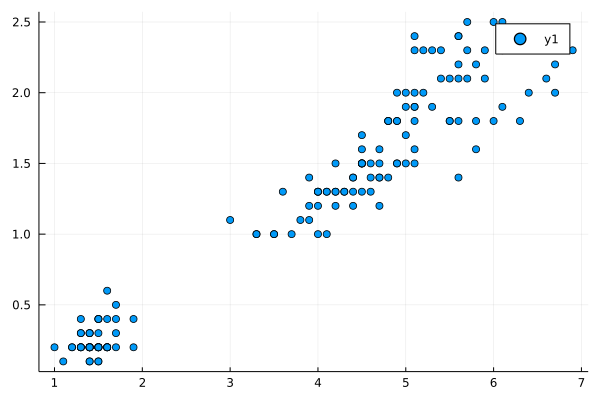

In [541]:
@df iris scatter(:PetalLength, :PetalWidth)

#### With StatsPlots we can do a correlation plot of selected parameters:

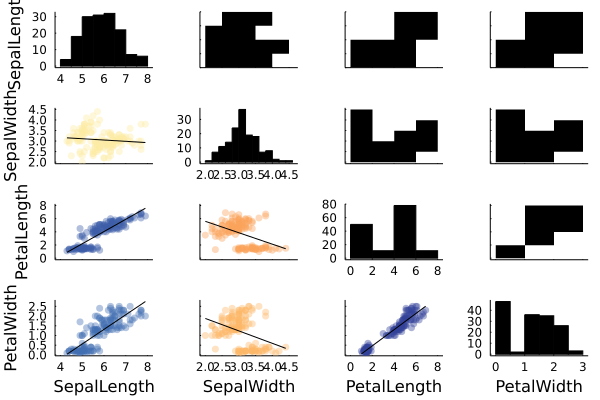

In [542]:
@df iris corrplot([:SepalLength :SepalWidth :PetalLength :PetalWidth], grid = false)

#### Histogram of sepal length grouped by species

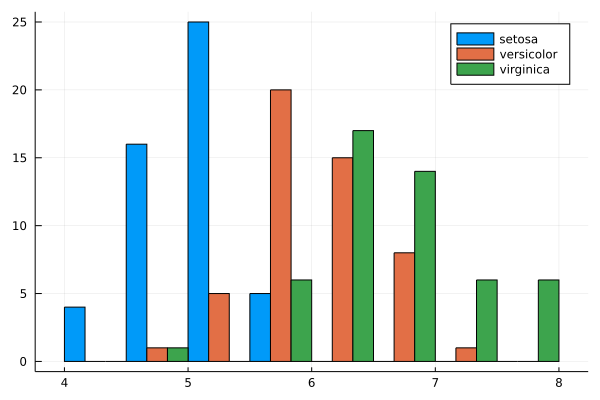

In [543]:
@df iris groupedhist(:SepalLength, group = :Species, bar_position = :dodge)

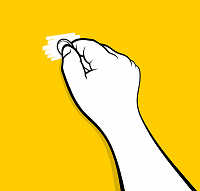

## Scratching the surface in 45 minutes

All packages in Julia are very well documented 

- CSV.jl
- XLSX.jl
- JSON.jl
- DataFrames.jl
- Plots.jl
- StatsPlots.jl

